# Exercises
- Do your work for these exercises in a jupyter notebook named scaling. Use the telco dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from env import host, user, password

# visualize
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(11, 9))
plt.rc('font', size=13)

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

import os
os.path.isfile('telco_df.csv')

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
import sklearn.preprocessing
from sklearn.preprocessing import QuantileTransformer

import wrangle
import prepare

#1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [2]:
#acquire, prepare, and split dataframe using function from wrangle.py
train, validate, test= wrangle.wrangle_telco_two_year()

In [3]:
train.head()# look at first five values

,customer_id,monthly_charges,tenure,total_charges
1256,2805-AUFQN,19.80,25,475.20
225,1699-TLDLZ,19.70,16,301.55
662,1985-MBRYP,19.65,43,779.25
628,1206-EHBDD,80.30,56,4513.65
824,4872-JCVCA,47.60,71,3377.80


In [4]:
train.drop(columns='customer_id', inplace= True) # dropping customer id in train dataset b/c categorical variable not able to scale with it

In [5]:
train.head()#making sure customer id was dropped.

,monthly_charges,tenure,total_charges
1256,19.80,25,475.20
225,19.70,16,301.55
662,19.65,43,779.25
628,80.30,56,4513.65
824,47.60,71,3377.80


In [6]:
validate.drop(columns='customer_id', inplace= True)# dropping customer id in validate dataset b/c categorical variable not able to scale with it

In [7]:
test.drop(columns='customer_id', inplace= True)# dropping customer id in test dataset b/c categorical variable not able to scale with it

In [8]:
train['monthly_charges'] #Making sure this code only filters for monthly charges columns

1256     19.80
225      19.70
662      19.65
628      80.30
824      47.60
         ...  
441      18.80
98      109.65
886      94.35
322      19.75
1593     20.55
Name: monthly_charges, Length: 949, dtype: float64

Text(0.5, 1.0, 'Scaled')

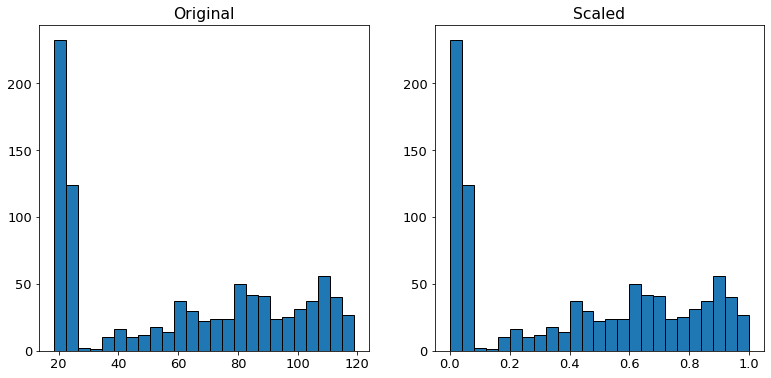

In [9]:
#create the object: MinMaxScaler
scaler = MinMaxScaler()

# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(train[['monthly_charges']])

x_train_scaled = scaler.transform(train[['monthly_charges']])
x_validate_scaled = scaler.transform(validate)
x_test_scaled = scaler.transform(test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train[['monthly_charges']], bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')



Text(0.5, 1.0, 'Scaled')

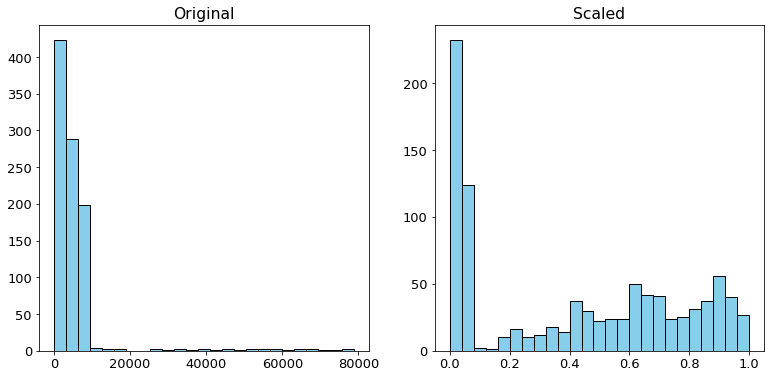

In [10]:
scaler2 = MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler2.fit(train[['total_charges']])

x_train_scaled2 = scaler2.transform(train[['total_charges']])
x_validate_scaled2 = scaler2.transform(validate)
x_test_scaled2 = scaler2.transform(test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train[['total_charges']], bins=25, color='skyblue', ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, color='skyblue', ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

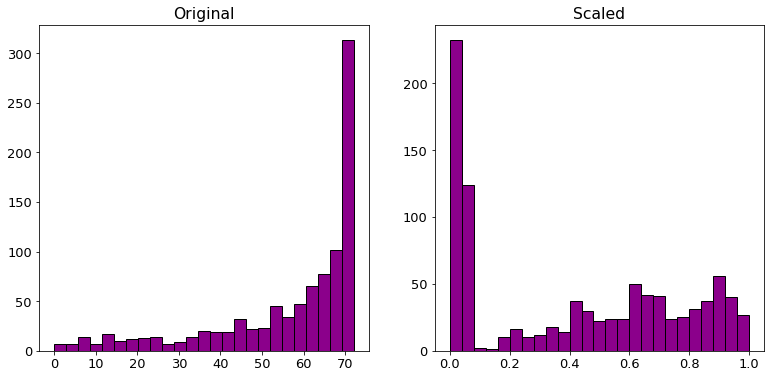

In [11]:
scaler3 = MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler3.fit(train[['tenure']])

x_train_scaled3 = scaler3.transform(train[['tenure']])
x_validate_scaled3 = scaler3.transform(validate)
x_test_scaled3 = scaler3.transform(test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train[['tenure']], bins=25, color='darkmagenta', ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, color='darkmagenta', ec='black')
plt.title('Scaled')

Min-max scaling is a linear scaling method that transforms our features such that the range is between 0 and 1.

Text(0.5, 1.0, 'Standard Scale')

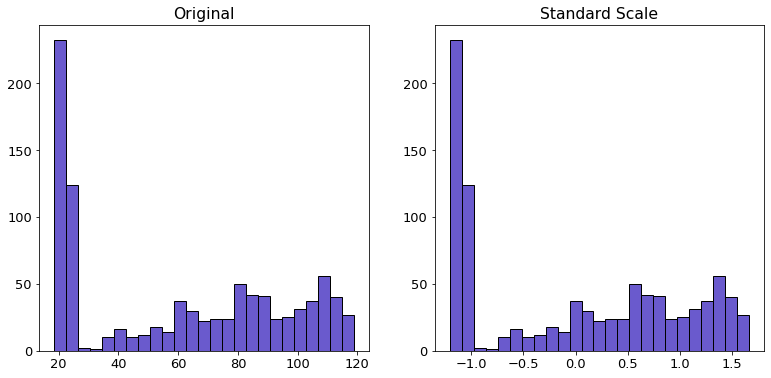

In [19]:
#Create the object: Standard Scaler
scaler4 = sklearn.preprocessing.StandardScaler()


# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler4.fit(train[['monthly_charges']])

train_scaled4 = scaler4.transform(train[['monthly_charges']])
validate_scaled = scaler4.transform(validate[['monthly_charges']])
test_scaled4 = scaler4.transform(test[['monthly_charges']])

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train[['monthly_charges']], bins=25, color='slateblue', ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled4, bins=25, color='slateblue', ec='black')
plt.title('Standard Scale')

- Standardization is a linear transformation of our data such that is looks like the standard normal distribution. That is, it will have a mean of 0 and a standard deviation of 1.
- scaling: dividing each data point by the standard deviation. This causes the resulting dataset to have a standard deviation of 1.
- centering: subtracting the mean from each data point. This causes the resulting dataset to have a mean of 0

Text(0.5, 1.0, 'Robust Scaled')

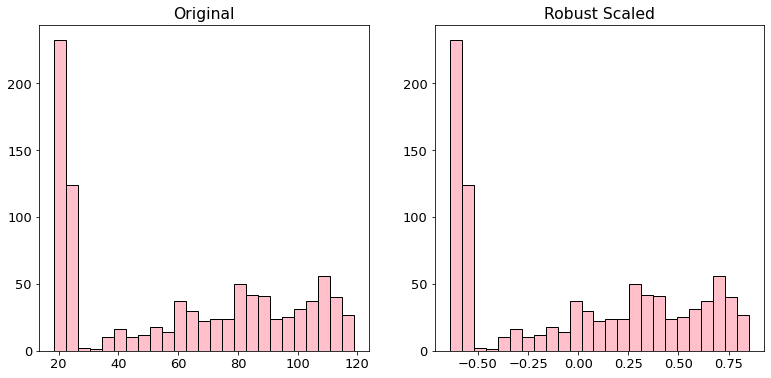

In [22]:
#create the object: Robust Scaler
scaler5 = sklearn.preprocessing.RobustScaler()


# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler5.fit(train[['monthly_charges']])

train_scaled5 = scaler5.transform(train[['monthly_charges']])
validate_scaled5 = scaler5.transform(validate)
test_scaled5 = scaler5.transform(test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train[['monthly_charges']], bins=25, color='pink', ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled5, bins=25, color='pink', ec='black')
plt.title('Robust Scaled')

A robust scaler is another linear transformation that follows the same idea as the standard scaler but uses parameters that are more robust to outliers.

#2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [23]:
#inverse tranforming original scaler
#Create a new column that has been transformed to use with inverse transform method
train['standard_monthly_charges'] = scaler.transform(train[['monthly_charges']])

x_train_inverse_scaled = scaler.inverse_transform(train[['standard_monthly_charges']])
x_validate_inverse_scaled = scaler.inverse_transform(validate)
x_test_inverse_scaled= scaler.inverse_transform(test)

Text(0.5, 1.0, 'Inverse Scaled')

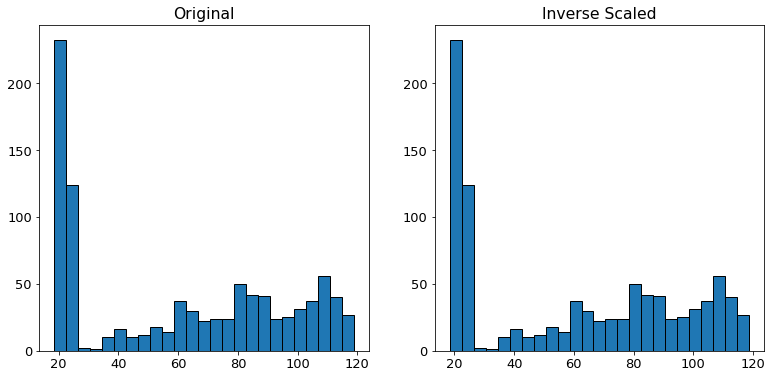

In [24]:
#visualizing it
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train[['monthly_charges']], bins=25, ec='black')
plt.title('Original')


plt.subplot(122)
plt.hist(x_train_inverse_scaled, bins=25, ec='black')
plt.title('Inverse Scaled')

In [25]:
#tranforming original scaler2
train['standard_total_charges']= scaler2.transform(train[['total_charges']])

x_train_inverse_scaled2 = scaler2.inverse_transform(train[['standard_total_charges']])
x_validate_inverse_scaled2 = scaler2.inverse_transform(validate)
x_test_inverse_scaled2 = scaler2.inverse_transform(test)

Text(0.5, 1.0, 'Inverse Scaled')

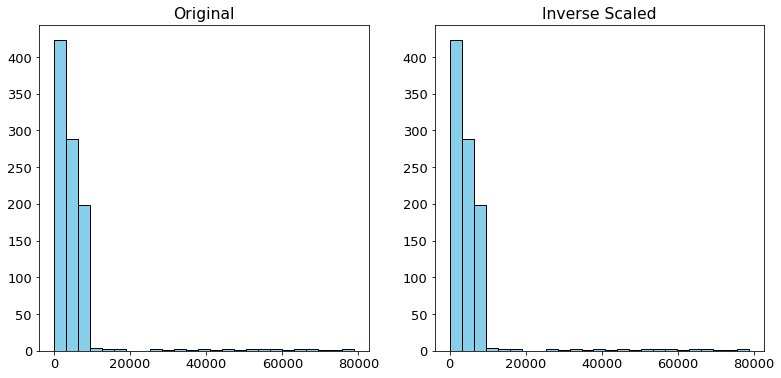

In [26]:
#visualizing it
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train[['total_charges']], bins=25, color='skyblue', ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_inverse_scaled2, bins=25, color='skyblue', ec='black')
plt.title('Inverse Scaled')

In [27]:
#tranforming original scaler
train['standard_tenure']= scaler3.transform(train[['tenure']])

x_train_inverse_scaled3 = scaler3.inverse_transform(train[['standard_tenure']])
x_validate_inverse_scaled3 = scaler3.inverse_transform(validate)
x_test_inverse_scaled3 = scaler3.inverse_transform(test)

Text(0.5, 1.0, 'Inverse Scaled')

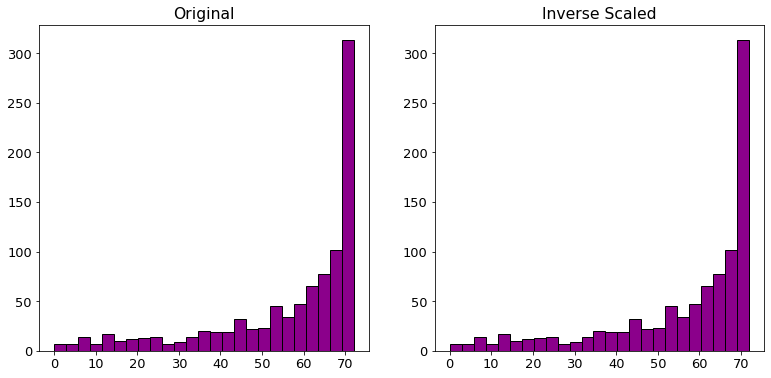

In [28]:
#visualize it
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train[['tenure']], bins=25, color='darkmagenta', ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_inverse_scaled3 , bins=25, color='darkmagenta', ec='black')
plt.title('Inverse Scaled')

#3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [29]:
#Create the object
quantile = QuantileTransformer(output_distribution='normal')

In [30]:
#Fit and transform it
data_trans = quantile.fit_transform(train[['monthly_charges']])

Text(0.5, 1.0, 'Quantile Transformed')

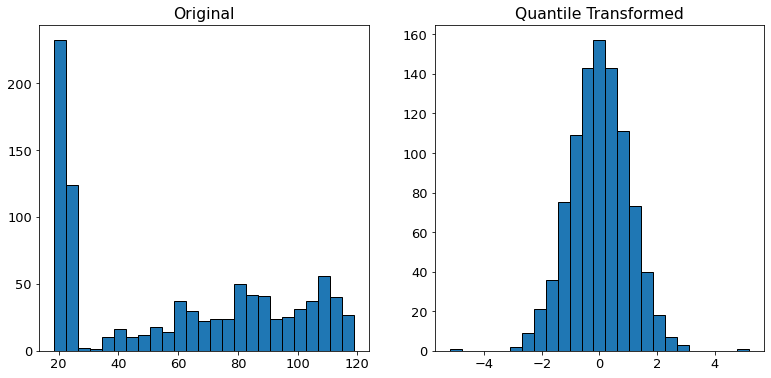

In [31]:
#visualize it
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train[['monthly_charges']], bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(data_trans , bins=25, ec='black')
plt.title('Quantile Transformed')

In [32]:
#Create the object
quantile2 = QuantileTransformer(output_distribution='normal')

In [33]:
#Fit and transform it
data_trans2 = quantile.fit_transform(train[['total_charges']])

Text(0.5, 1.0, 'Quantile Transformed')

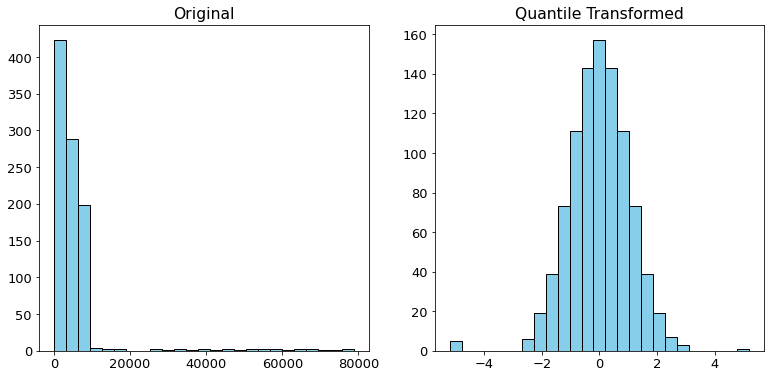

In [34]:
#visualizing it
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train[['total_charges']], bins=25, color='skyblue', ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(data_trans2, bins=25, color='skyblue', ec='black')
plt.title('Quantile Transformed')

In [35]:
#Create the object
quantile3 = QuantileTransformer(output_distribution='normal')

In [36]:
#Fit and transform it
data_trans3 = quantile.fit_transform(train[['tenure']])

Text(0.5, 1.0, 'Quantile Transformed')

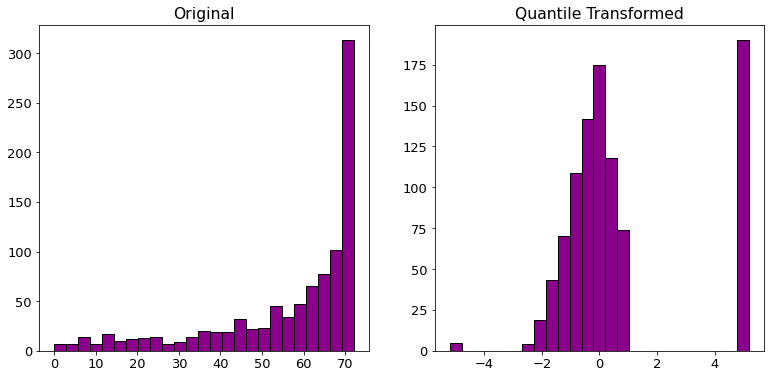

In [37]:
#visualize it
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train[['tenure']], bins=25, color='darkmagenta', ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(data_trans3 , bins=25, color='darkmagenta', ec='black')
plt.title('Quantile Transformed')

#4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

In [38]:
#Create the object
quantile_no_norm = QuantileTransformer()

In [39]:
#Fit and transform it
data_transformed = quantile_no_norm.fit_transform(train[['total_charges']])

Text(0.5, 1.0, 'Quantile Transformed')

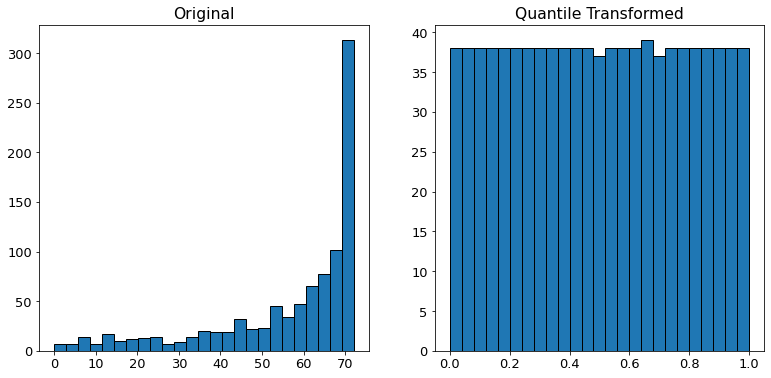

In [40]:
#visualize it
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train[['tenure']], bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(data_transformed , bins=25, ec='black')
plt.title('Quantile Transformed')

In [41]:
#Create the object
quantile_no_norm2 = QuantileTransformer()

In [42]:
#Fit and transform it
data_transformation2 = quantile_no_norm2.fit_transform(train[['total_charges']])

Text(0.5, 1.0, 'Quantile Transformed')

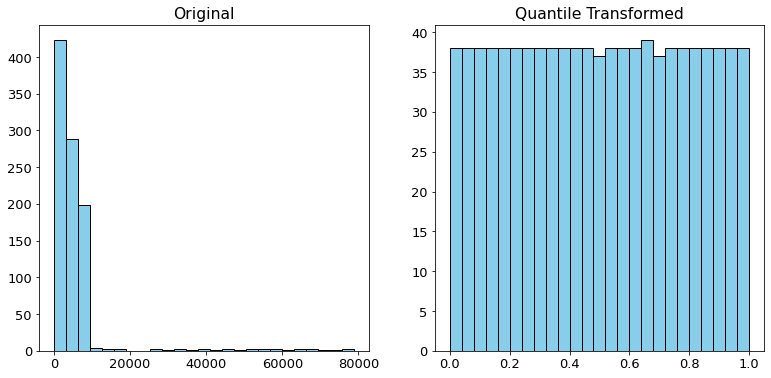

In [43]:
#visualizing it
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train[['total_charges']], bins=25, color='skyblue', ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(data_transformation2, bins=25, color='skyblue', ec='black')
plt.title('Quantile Transformed')

In [44]:
#Create the object
quantile_no_norm3 = QuantileTransformer()

In [45]:
#Fit and transform it
data_transformation3 = quantile_no_norm3.fit_transform(train[['tenure']])

Text(0.5, 1.0, 'Quantile Transformed')

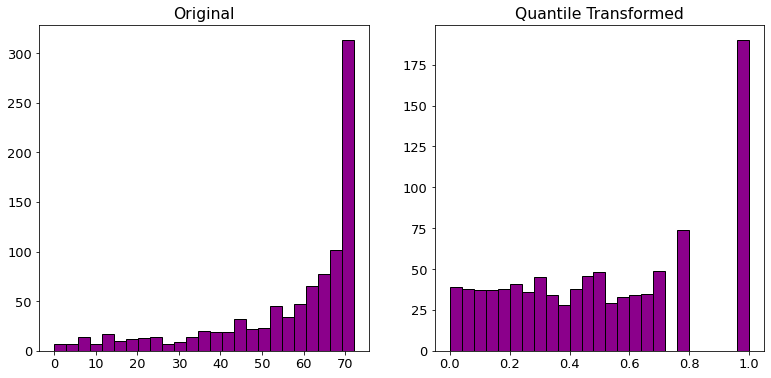

In [46]:
#visualize it
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train[['tenure']], bins=25, color='darkmagenta', ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(data_transformation3 , bins=25, color='darkmagenta', ec='black')
plt.title('Quantile Transformed')

I notice the visual looks different and this is due the output_distribution is set at uniform distribution instead of normal distribution.

#5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!


In [47]:
train2, validate2, test2= prepare.scaler_telco()

In [48]:
train2.shape, validate2.shape, test2.shape

((949, 1), (407, 3), (339, 3))